Импорт необходимых библиотек

In [37]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

Задача 1. Загрузить данные из файла avianHabitat.csv. Подготовить данные для дальнейшего анализа, убрав нулевые элементы  

In [30]:
# Загрузка данных
data = pd.read_csv('avianHabitat.csv')

# Удаление строк, где есть нулевые значения
cleaned_data = data[(data['DBHt']!=0)]
cleaned_data = cleaned_data[(cleaned_data['WHt']!=0)]

Задача 2. Рассчитать для переменных, описывающих высоту расстений DBHt, следующие значения:
* максимальное и минимальное значения
* размах распределения
* среднее значение
* медиану
* моду
* дисперсию
* среднеквадратическое отклонение
* первый и третий квартиль
* интерквартильный размах
* асимметрию
* эксцесс

In [31]:
# Достаем нужный столбец
dbht_values = cleaned_data['DBHt']

# Максимальное и минимальное значения
max_value, min_value = dbht_values.max(), dbht_values.min()

# Размах распределения
range_value = max_value - min_value

# Среднее значение
mean_value = dbht_values.mean()

# Медиана - значение, которое строго по центру выборки, упорядоченной по возрастанию
median_value = dbht_values.median()

# Мода - значение, которое встречается в выборке чаще остальных
if not dbht_values.mode().empty:
    mode_value = dbht_values.mode()[0]
else:
    mode_value = "Моды нет"

# Дисперсия - разброс между результатами
variance_value = dbht_values.var()

# Среднеквадратическое отклонение - корень из дисперсии
std_value = dbht_values.std()

# Первый квартиль - значение, меньше которого будет 25% наблюдений, а 75% будут больше
# Третий квартиль - значение, меньше которого будет 75% наблюдений, а 25% будут больше
first_quantile_value = dbht_values.quantile(0.25)
third_quantile_value = dbht_values.quantile(0.75)

# Интерквартильный размах - оценивается для изменчивости, в которой находится большинство значений. Аналог дисперсии
iqr_value = third_quantile_value - first_quantile_value

# Асимметрия - степень отклонения графика распределений показателей от симметричного графика распределений
def calculate_skewness(data):
    return ((np.sum((data - np.mean(data)) ** 3)) / len(data)) / ((np.sum((data - np.mean(data)) ** 2) / len(data)) ** 1.5)

skewness_value = calculate_skewness(dbht_values)

# Эксцесс - показатель остроты пика графика распределения. Если >0, то график плосковершинный
def calculate_kurtosis(data):
    return ((np.sum((data - np.mean(data)) ** 4)) / len(data)) / ((np.sum((data - np.mean(data)) ** 2) / len(data)) ** 2) - 3

kurtosis_value = calculate_kurtosis(dbht_values)

# Вывод полученных данных
print(f"Максимум: {max_value}")
print(f"Минимум: {min_value}")
print(f"Размах распределения: {range_value}")
print(f"Среднее значение: {mean_value}")
print(f"Медиана: {median_value}")
print(f"Мода: {mode_value}")
print(f"Дисперсия: {variance_value}")
print(f"Среднеквадратическое отклонение: {std_value}")
print(f"Первый квартиль: {first_quantile_value}")
print(f"Третий квартиль: {third_quantile_value}")
print(f"Интерквартильный размах: {iqr_value}")
print(f"Асимметрия: {skewness_value}")
print(f"Эксцесс: {kurtosis_value}")

Максимум: 10.0
Минимум: 0.1
Размах распределения: 9.9
Среднее значение: 1.849034749034749
Медиана: 1.5
Мода: 1.2
Дисперсия: 1.746384723594026
Среднеквадратическое отклонение: 1.321508503035083
Первый квартиль: 1.0
Третий квартиль: 2.3499999999999996
Интерквартильный размах: 1.3499999999999996
Асимметрия: 2.0998293171152183
Эксцесс: 7.037234098651988


Задача 3. Построить диаграмму с усами (boxplot) для DBHt данных

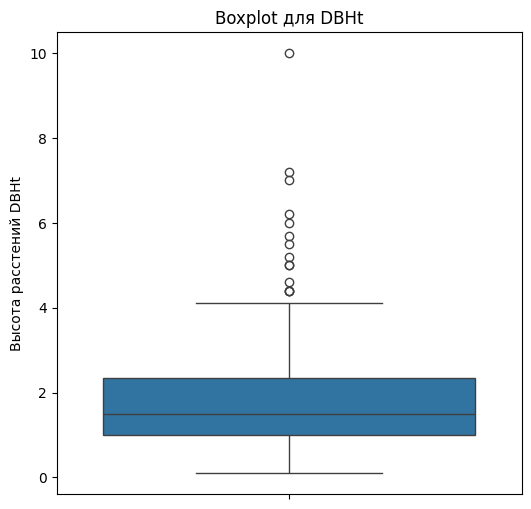

In [32]:
plt.figure(figsize=(6, 6))
sb.boxplot(data=dbht_values)
plt.title('Boxplot для DBHt')
plt.ylabel('Высота расстений DBHt')
plt.show()

# Медиана - центральная часть внутри "коробки"
# Первый и третий квартиль - границы "коробки"
# "Усы" - диапазон данных, которые не являются выбросом
# Выбросы - точки, которые находятся за пределами усов

Задача 4. Построить на одном рисунке диаграммы с усами для DBHt и WHt

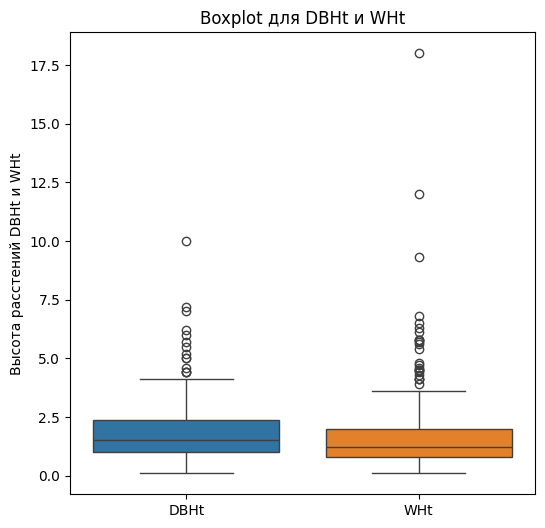

In [34]:
plt.figure(figsize=(6, 6))
sb.boxplot(data=cleaned_data[['DBHt', 'WHt']])
plt.title('Boxplot для DBHt и WHt')
plt.ylabel('Высота расстений DBHt и WHt')
plt.show()

# Медиана - центральная часть внутри "коробки"
# Первый и третий квартиль - границы "коробки"
# "Усы" - диапазон данных, которые не являются выбросом
# Выбросы - точки, которые находятся за пределами усов

Задача 5. Построить эмпирическую функцию распределения (построить самому и воспользоваться реализованными функциями (при наличии), сравнить результат)

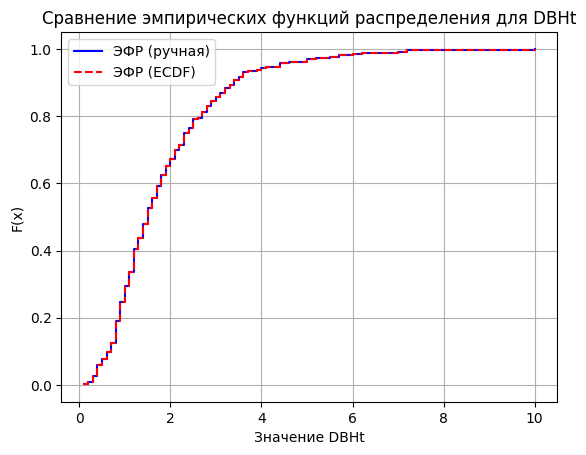

In [38]:
def empirical_cdf_manual(data):
    sorted_data = np.sort(data)
    y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)  # Функция распределения: ранжируем элементы
    return sorted_data, y_vals

sorted_dbht, cdf_manual = empirical_cdf_manual(dbht_values)
ecdf = ECDF(dbht_values)

# ЭФР вручную
plt.step(sorted_dbht, cdf_manual, where="post", label="ЭФР (ручная)", color="blue")
# ЭФР с помощью ECDF
plt.step(ecdf.x, ecdf.y, where="post", label="ЭФР (ECDF)", color="red")

plt.title("Сравнение эмпирических функций распределения для DBHt")
plt.xlabel("Значение DBHt")
plt.ylabel("F(x)")
plt.legend()
plt.grid(True)
plt.show()

# ЭФР показывает как накапливаются данные по мере их увеличения. Позволяет видеть
# как распределены данные и насколько велика вероятность того, что случайное
# значение из выборки окажется меньше или равно конкретному значению

Задача 6. Построить гистограмму вероятностей и сгладить ее кривой

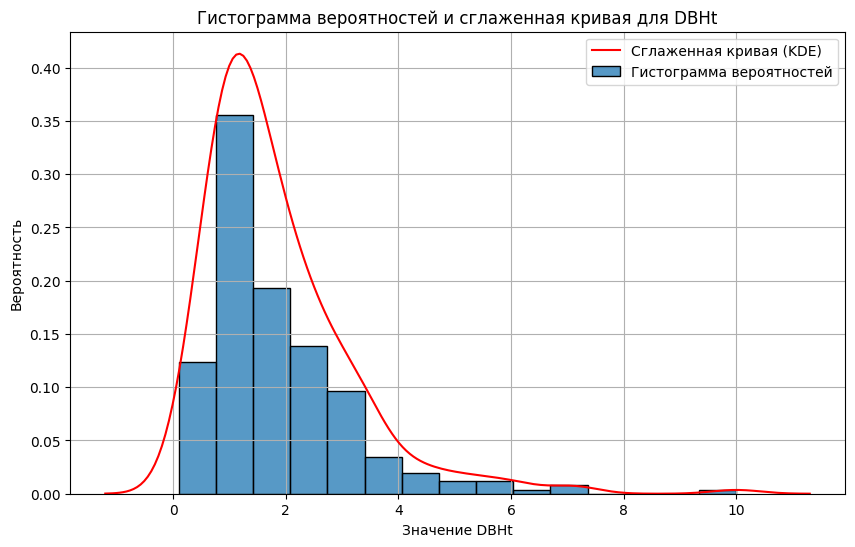

In [41]:
# Построение гистограммы вероятностей
plt.figure(figsize=(10, 6))
sb.histplot(dbht_values, bins=15, kde=False, stat="probability", label="Гистограмма вероятностей")

# Добавление сглаженной кривой (KDE)
sb.kdeplot(dbht_values, color="red", label="Сглаженная кривая (KDE)")

plt.title("Гистограмма вероятностей и сглаженная кривая для DBHt")
plt.xlabel("Значение DBHt")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True)
plt.show()

Задача 7. Построить графики квантиль-квантиль (qq-plot), сделать вывод: распределены ли данные нормально?

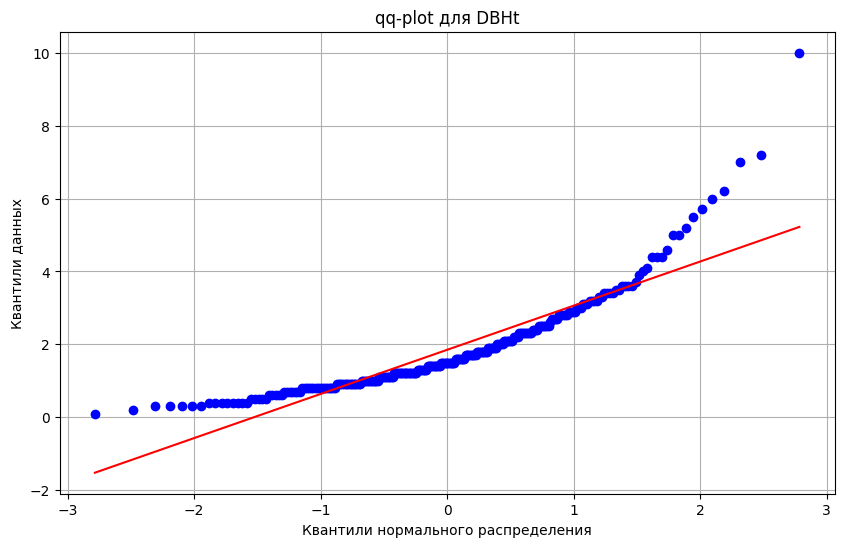

Статистика = 0.83166, p-значение = 4.473785249704735e-16
Распределение EHt существенно отличается от нормального


In [47]:
# Построение qq-plot
plt.figure(figsize=(10, 6))
stats.probplot(dbht_values, dist="norm", plot=plt)

plt.title("qq-plot для DBHt")
plt.xlabel("Квантили нормального распределения")
plt.ylabel("Квантили данных")
plt.grid(True)
plt.show()

shapiro_test = stats.shapiro(dbht_values)
print(f"Статистика = {shapiro_test[0]:.5f}, p-значение = {shapiro_test[1]}")

if shapiro_test[1] < 0.05:
    print("Распределение EHt существенно отличается от нормального")
else:
    print("Распределение EHt не отличается от нормального")
